### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Import clean csv file

In [2]:
pd.set_option('display.max_columns', None)
pixar_films = pd.read_csv("../data/joined.csv")
pixar_films.tail(3)

,film,rotten_tomatoes_score,characters,assets,best_picture,animated_feature,original_screenplay,adapted_screenplay,original_score,original_song,sound_editing,sound_mixing,other,year,budget,u.s._and_canada,other_territories,worldwide,num_characters,num_assets,assets_+_characters
24,Turning Red,NaN,"The Inner 13-Year Old, Meilin Lee, Red Panda M...","“Chunky Cute”, Toronto, Chinatown & the Lee Fa...",NaN,Nominated,NaN,Ineligible,NaN,NaN,NaN,NaN,NaN,2022,175.0,NaN,20,20,12,6,18
25,Luca,NaN,"Just Add Water, Luca Paguro, Alberto Scorfano,...","Italy, Summertime and Sea Monsters, Portorosso...",NaN,Nominated,NaN,Ineligible,NaN,NaN,NaN,NaN,NaN,2021,NaN,NaN,50,50,11,5,16
26,Soul,NaN,"Joe Gardner, 22, Dez, Dorothea Williams , Libb...","Building The Performances, New York City, Barb...",NaN,Won,NaN,Ineligible,Won,NaN,Nominated,Nominated,NaN,2020,150.0,NaN,121,121,13,8,21


## Visualization

    Relation between 'Budget' and number of 'Characters' + 'Assets' of each film

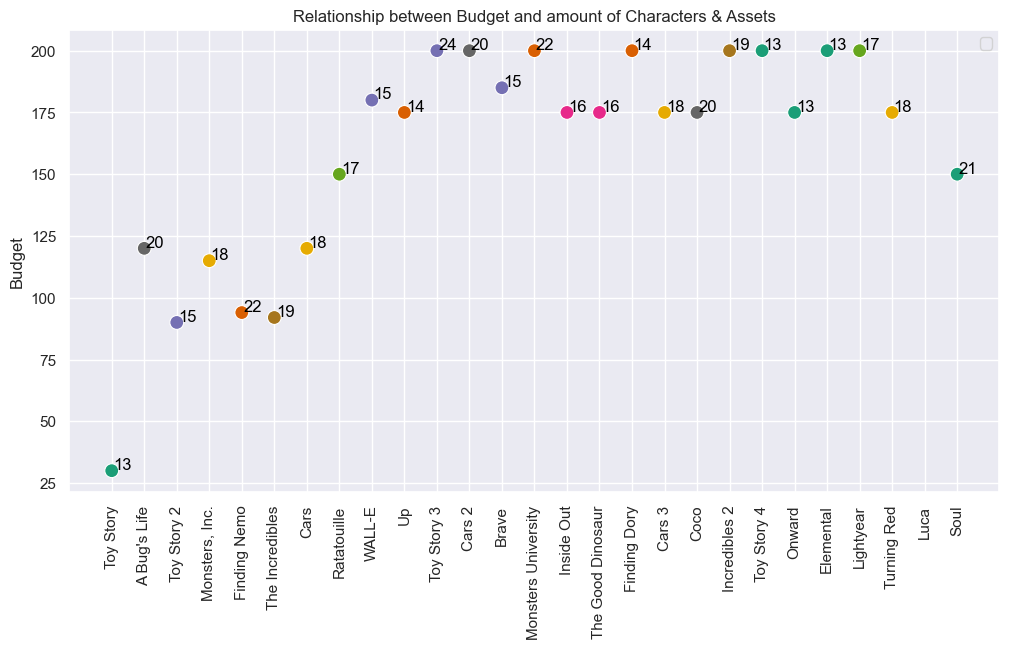

In [6]:
sns.scatterplot(data=pixar_films, x='film', y='budget', hue='assets_+_characters', palette='Dark2', s=100)
for i in range(pixar_films.shape[0]):
    # plt.text(pixar_films["film"][i], pixar_films["budget"][i], pixar_films["assets_+_characters"][i], fontsize=10, color='black', ha='left')
    plt.annotate(pixar_films["assets_+_characters"][i], (pixar_films["film"][i], pixar_films["budget"][i]), textcoords="offset points", xytext=(1, 1), fontsize=12, color='black')
sns.set(rc={"figure.figsize": (16, 6)})

plt.xlabel('')
plt.ylabel('Budget')
plt.title('Relationship between Budget and amount of Characters & Assets')
plt.legend(labels=[])
plt.xticks(rotation=90)
plt.savefig('../figures/budget_art_design.png', bbox_inches='tight')

plt.show()

    How budget has incremented over the years (related with technology)

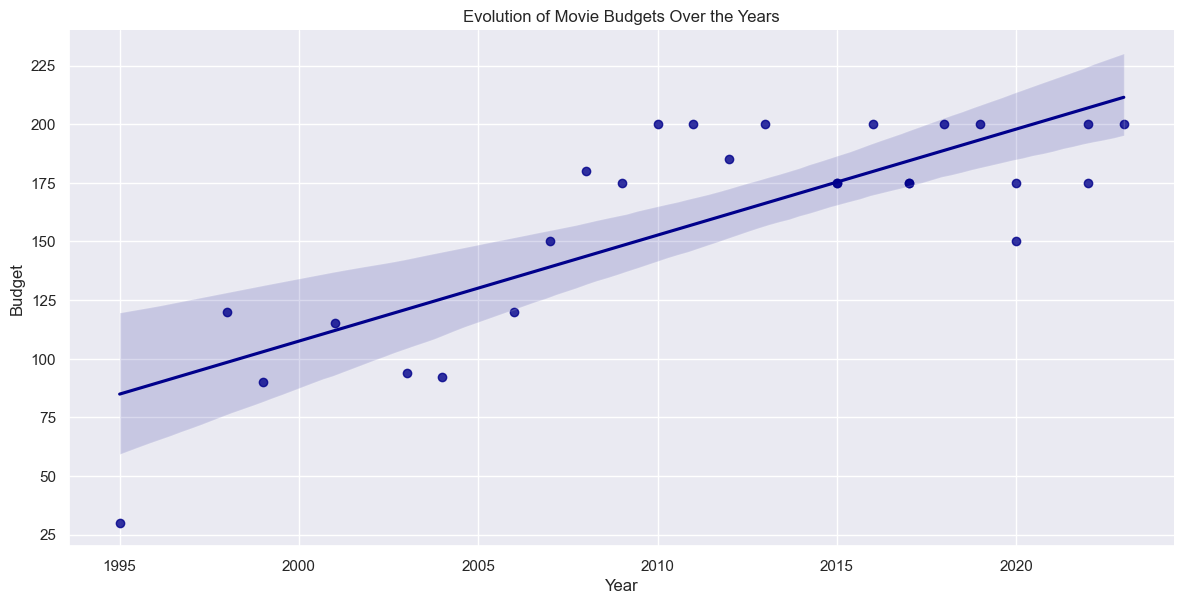

In [4]:
sns.lmplot(data=pixar_films, x='year', y='budget', aspect=2, height=6, line_kws={'color': 'darkblue'}, scatter_kws={'color': 'darkblue'})
sns.set(rc={"figure.figsize": (12, 6)})

plt.xlabel('Year')
plt.ylabel('Budget')
plt.title('Evolution of Movie Budgets Over the Years')
plt.savefig('../figures/budget_over_years.png', bbox_inches='tight')

plt.show()

    Won Animated Feature Award related with Revenue

    Budget vs. Worldwide Revenue

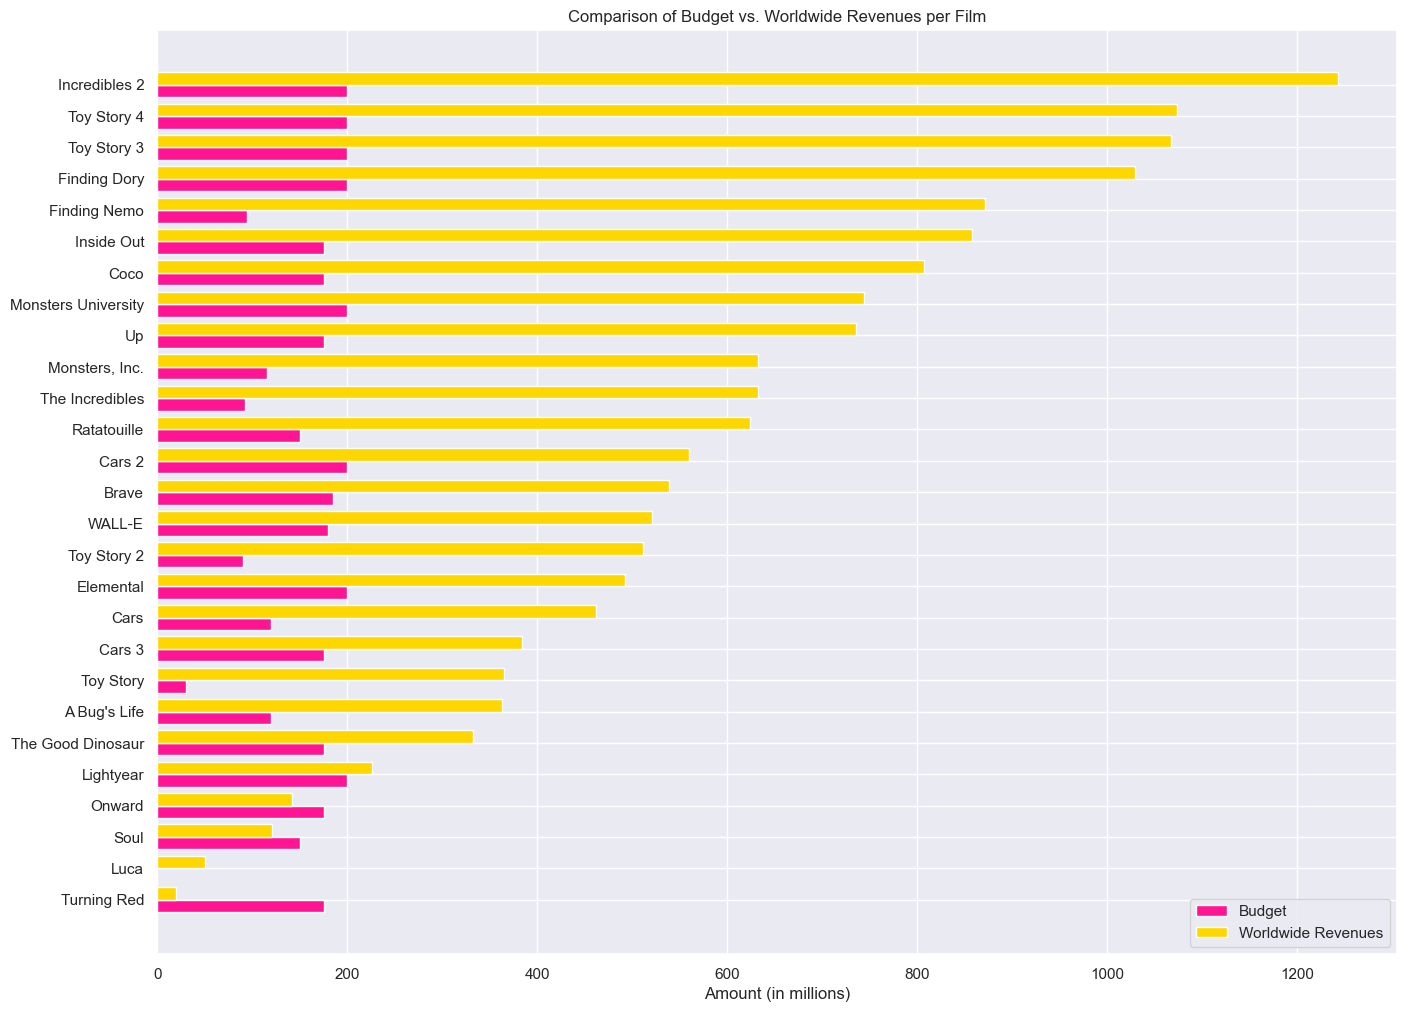

In [5]:
pixar_subset = pixar_films.sort_values(by="worldwide", ascending=True)

fig, ax = plt.subplots()

bar_width = 0.4
bar_positions = np.arange(len(pixar_subset))

ax.barh(bar_positions, pixar_subset['budget'], bar_width, color='deeppink', label='Budget')

ax.barh(bar_positions + bar_width, pixar_subset['worldwide'], bar_width, color='gold', label='Worldwide Revenues')

ax.set_yticks(bar_positions + bar_width / 2)
ax.set_yticklabels(pixar_subset['film'])
ax.set_xlabel('Amount (in millions)')
ax.set_title('Comparison of Budget vs. Worldwide Revenues per Film')

ax.legend()

fig.set_size_inches(16, 12)
fig.savefig('../figures/budget_vs_revenue.png', bbox_inches='tight')

plt.show()
